In [1]:
# Objective :

# 1. Use regex to work with tweet dataset.
# 2. Clean the data.
# 3. Extract qll hashtags
# 4. Analyze most popular hashtags.
# 5. Analyze most popular hashtags that occur with '#economy'

In [ ]:
RegEx Functions :

1. search() : search the "key" and returns if key present.
2. findall(): returns all the "key" in the form of List. (if not ot returns NULL List)
3. split() : returns list, splits the string with matching "key"
4. sub() : its substitutes "key" in the string with matching sequenece.
    

Matacharacters : 

- ^ : starts with    
- [] : Set of characters 
- (.) : any character
- ($) : ends with
- (\) : special sequence
- (*) : zero or more occurances 
- (+) : one or more occurances
- (?) : zero or one occurances
- {} : exactly mentioned occurances
- | : or 

Special Sequences :

- \s : It returns match with white space 
- \S : It returns match which do not have white space
- \A : Returns a match if specified characers are present at begining of string.
- \b : Returns a match if specified characers are present at begining or at end of string.
- \d : Returns a match if string contains digits.
- \D : Returns a match if string does not contain digits
- \w : Returns a match if string contains words a-z A-Z 0-9
- \W : Returns a match if string does not contain words a-z A-Z 0-9
- \Z : Returns a match if string contains words at the end of string.
 

Sets :

1. [abc]: it returns match where a,b,c is present.
2. [A-Z]or [a-z] : it returns match where A-Z, a-z is present.
3. [^abc] : it returns match except a,b,c.
4. [567]
5. [0-9]
6. [A-ZAa-z]

In [2]:
# Import Libraries

import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('raw_tweets_economy.txt', sep= "\t")

In [5]:
df.shape

(500, 2)

In [13]:
df['0'][50]

'Expanding cautiously is the best way to build a #business even if the #economy is slowing. Keep a healthy #cash res… https://t.co/fDIh8Nyyzb'

In [16]:
# Drop column 'Unnamed: 0' 

df.drop('Unnamed: 0', axis = 1, inplace = True)

In [19]:
# Rename column '0' to 'tweets'

df  = df.rename({'0' : 'tweets'}, axis = 1)

In [20]:
df

,tweets
0,Stocks losses deepen as a key recession warnin...
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,AP Explains: Is the US economy nearing a reces...
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,Who will stop mr. Mario Draghi and the ECB wit...
...,...
495,RT @michaeljohns: .@realDonaldTrump has transf...
496,RT @Emile1chedid: #Lebanon #Beirut #politics #...
497,RT @michaeljohns: .@realDonaldTrump has transf...
498,RT @farhadrahaei: RT.@HeshmatAlavi's #Facts #T...


In [25]:
# Lets get all tweets into a single Sequence (List) to clean up tweets data.

l1 = df['tweets'].values


In [28]:
type(l1), len(l1)

(numpy.ndarray, 500)

In [35]:
l1[0]

'Stocks losses deepen as a key recession warning surfaces @GOP #economy #fail #collapse #recession #gop #greed… https://t.co/F8kazAixUk'

In [ ]:
# 'Stocks losses deepen as a key recession warning surfaces @GOP 
# #economy #fail #collapse #recession #gop #greed… https://t.co/F8kazAixUk'

In [ ]:
# Tweet Contains : 

# 1. hashtags
# 2. URLs
# 3. User Handles
# 4. Retweets

#### Clean Data 

In [36]:
# 1. Convert all words into lower case

In [44]:
l1_lower = [i.lower()    for i in l1]

In [49]:
l1_lower[151]

'@realdonaldtrump with 30yr t under 2%, massive infrastructure plan announcement would be timely and counter trade w… https://t.co/qlk3ckcsiy'

In [52]:
# 2. Remove User Handles : starting with @

s1 = 'Hi there ! @realYash How are you ?  '

In [50]:
# Use Regular Expressions  [re]

import re

In [53]:
re.sub('@\w+', '', s1)

'Hi there !  How are you ? '

In [54]:
l1_noUserHandle = [ re.sub('@\w+', '', i)               for i in l1_lower]

In [56]:
l1_noUserHandle[151]

' with 30yr t under 2%, massive infrastructure plan announcement would be timely and counter trade w… https://t.co/qlk3ckcsiy'

In [57]:
# 3. Remove URLs

In [58]:

s1 = 'Hi there ! @realYash How are you ? https://t.co/qlk3ckcsiy' 

In [60]:
re.sub('\w+://\S+', '', s1)

'Hi there ! @realYash How are you ? '

In [61]:
l1_noUser_noURL = [ [re.sub('\w+://\S+', '', i)]                for i in l1_noUserHandle]

In [76]:
type(l1_noUser_noURL[0])

list

In [67]:
# 4. Extract hashtags 

In [78]:
hashtags =    [  re.findall("#\w+", str(i) )     for i in l1_noUser_noURL   ]

In [85]:
hashtags[:5]

[['#economy', '#fail', '#collapse', '#recession', '#gop', '#greed'],
 ['#economy',
  '#trump',
  '#maga',
  '#trumptrain2020',
  '#sheeple',
  '#farming',
  '#trad'],
 ['#business', '#economy', '#recession', '#tradewar', '#china', '#eu'],
 ['#economy'],
 []]

In [ ]:
# 5. First lets combine all hashtags in the form of a list

In [84]:
all_hashtags = []   # empty list

In [86]:
for i in hashtags :
    all_hashtags.extend(i)

In [88]:
len(all_hashtags)   # Total hashtags in all tweets

1061

In [89]:
# 6. Lets count : count of each hashtag

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
from collections import Counter

In [94]:
hashtag_count = Counter(all_hashtags)

In [106]:
hashtag_top_ten = hashtag_count.most_common()[: 10 ]                          

In [111]:
#hashtag_top_ten

In [116]:
hash2 = { i : j          for i, j in hashtag_top_ten }
    

In [118]:
type(hash2)

dict

In [120]:
hash2.keys()

dict_keys(['#economy', '#recession', '#india', '#business', '#hongkong', '#bloomberg', '#china', '#trump', '#markets', '#economics'])

In [122]:
hash2.values()

dict_values([246, 24, 20, 18, 17, 15, 12, 10, 9, 9])

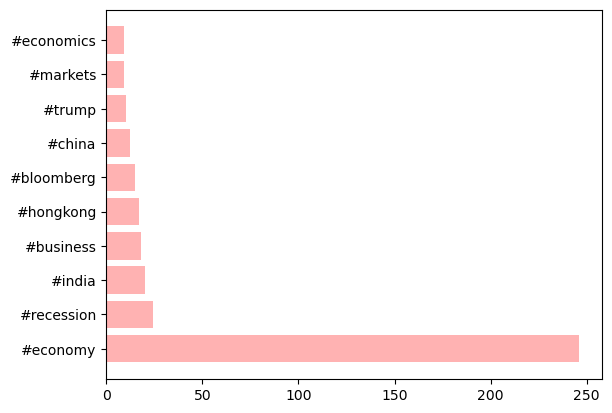

In [130]:
plt.barh(list(hash2.keys()), list(hash2.values()), color = 'red', alpha = 0.3 )
plt.show()